# Regressão Logística

# Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

# Dados

In [2]:
df = pd.read_csv("../datasets/CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

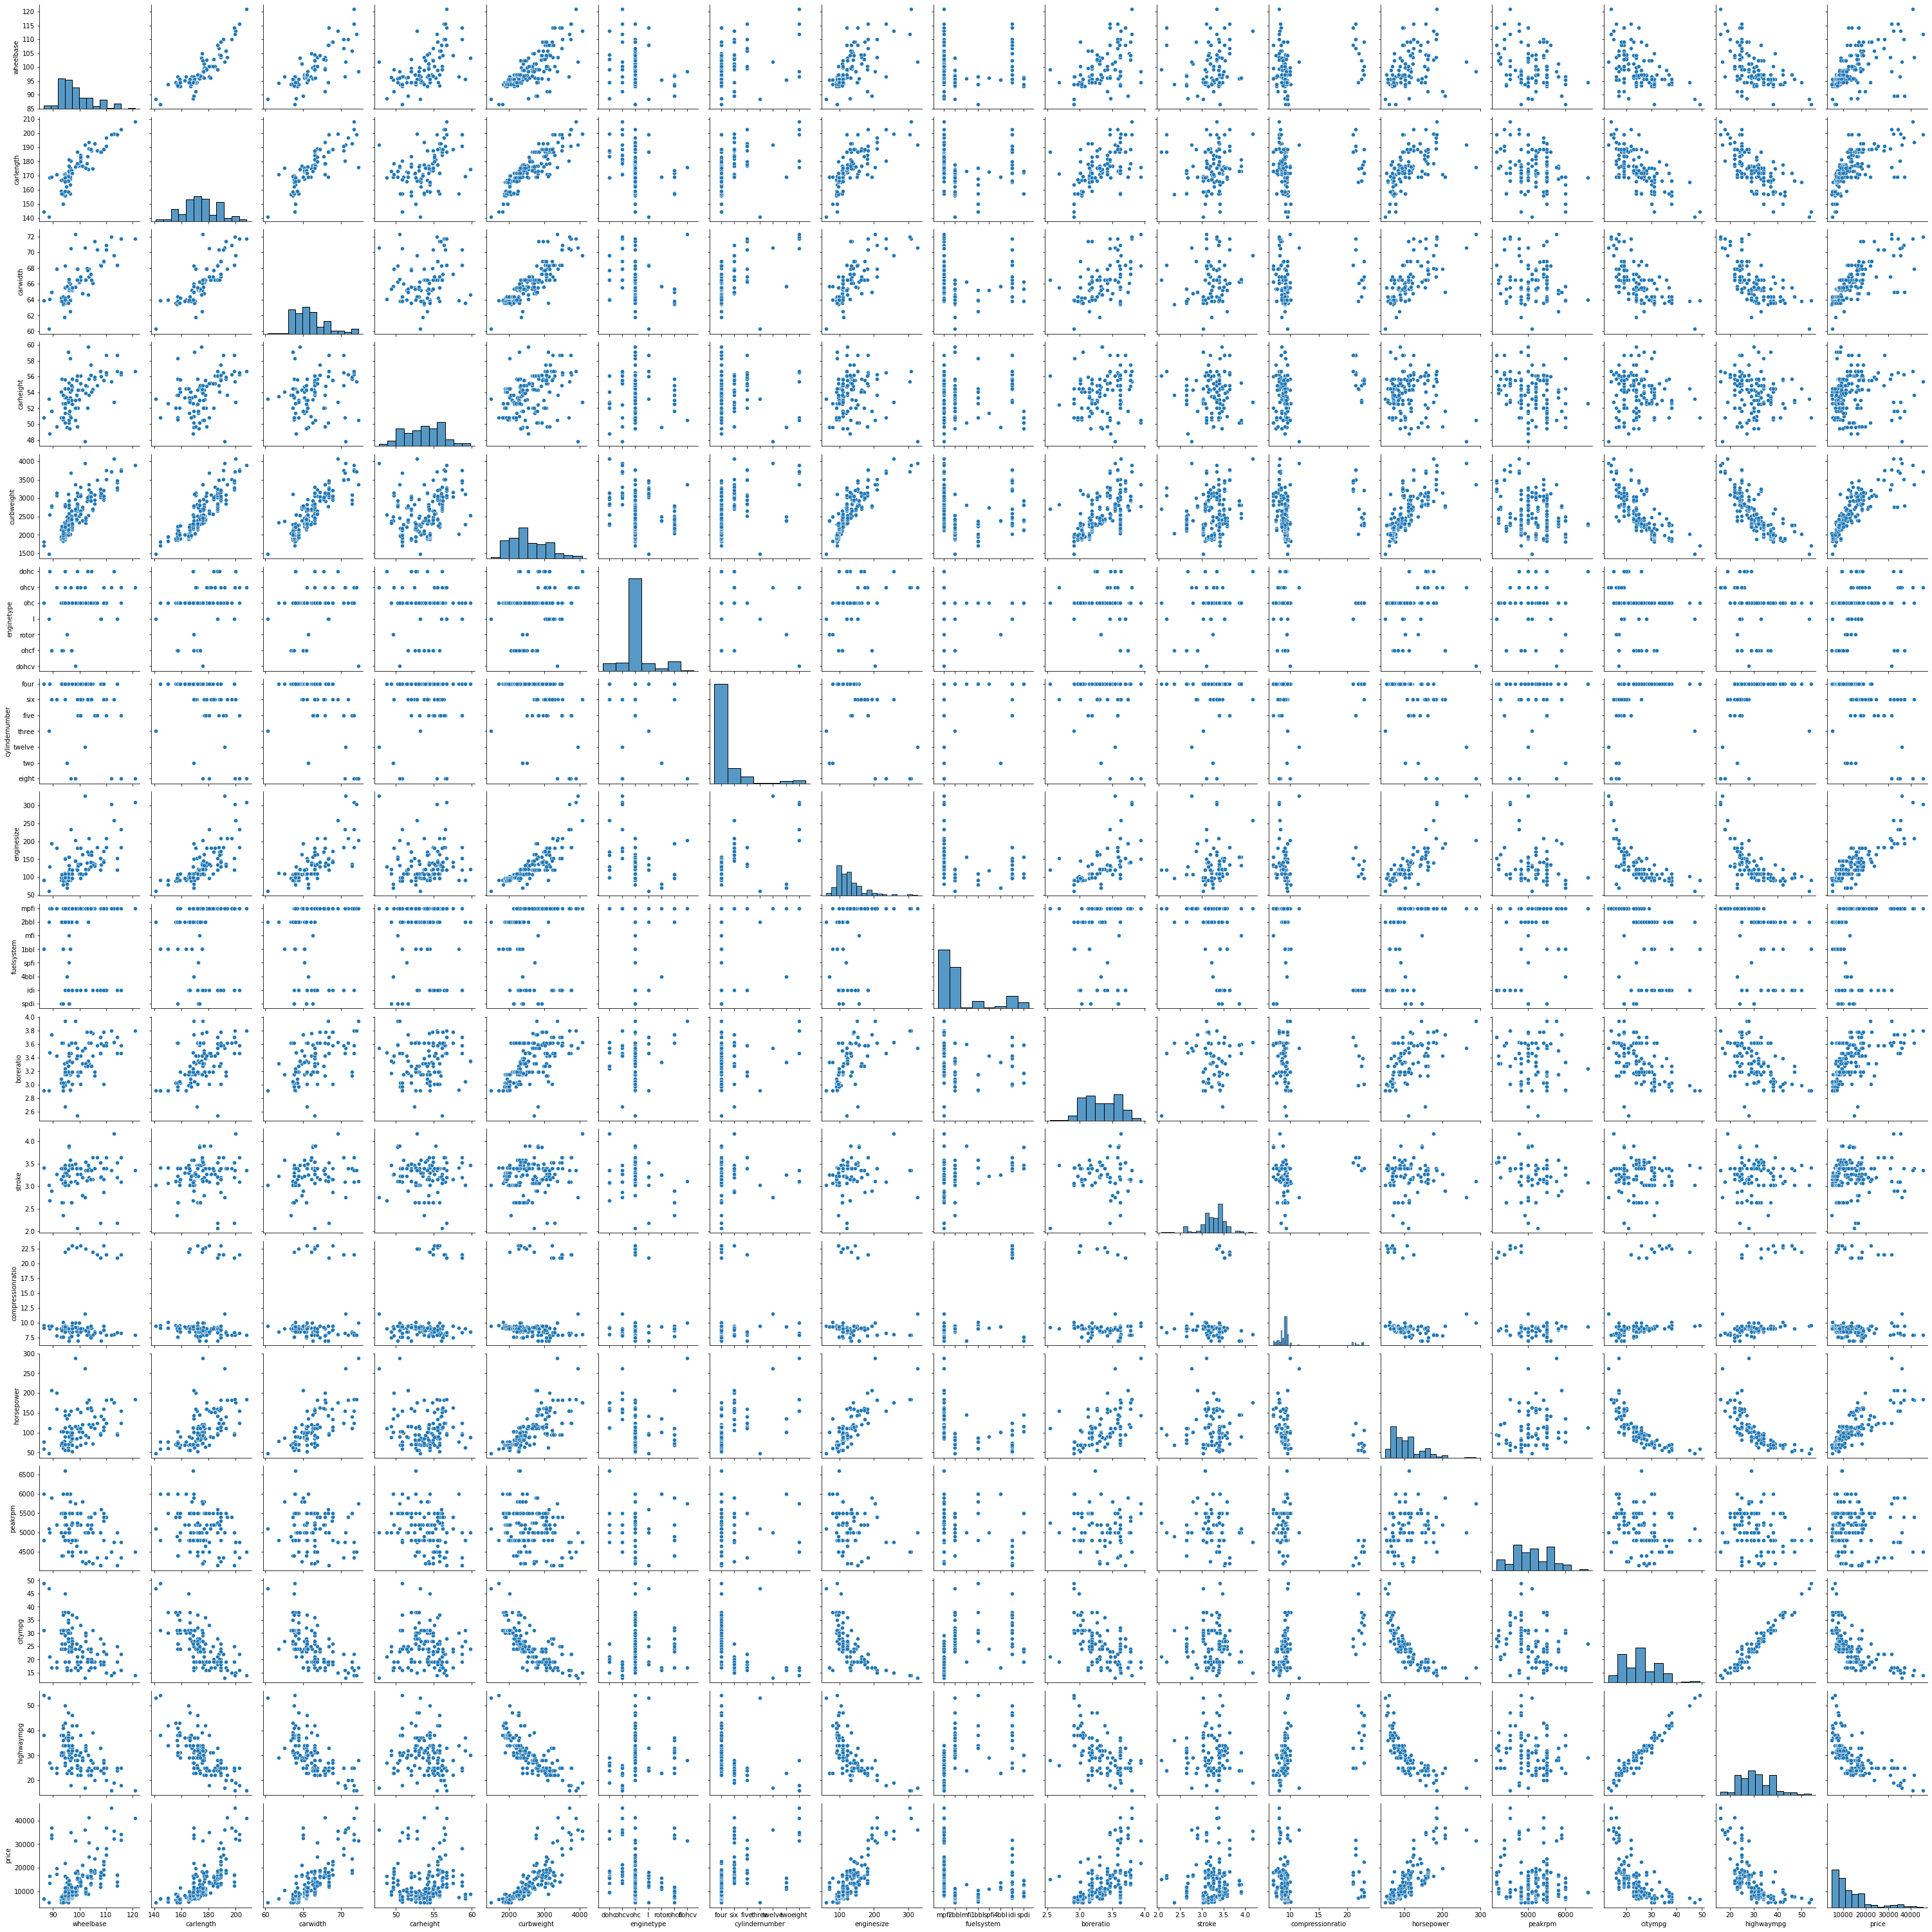

In [24]:
sns.pairplot(df, vars = ['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'])

## Correlações possíveis

- Altura e largura do carro
- Tamanho do Motor
- Potência do Motor à cavalo

# Cáculo da correlação entre X e Y

In [54]:
correlacao = np.corrcoef(df['enginesize'], df['price'])
correlacao

array([[1.       , 0.8741448],
       [0.8741448, 1.       ]])

## Formatar o DataFrame para Matriz

In [55]:
x = df['enginesize'].values.reshape(-1,1)
y = df['price']
x[0]

array([130], dtype=int64)

## Criar o modelo de Regressão

- O método **fit** treina o modelo com os dados fornecidos

In [57]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

## Coeficientes

- O atributo **intercept** armazena o termo independente no modelo linear.
- O atributo **coef_** armazena os Coeficientes estimados para o problema de regressão linear (inclinação da reta).
- O método **score** calcula o coeficiente de determinação

In [61]:
print(lm.coef_)
print(lm.intercept_)

[167.69841639]
-8005.4455311452


In [65]:
print('Equação: {} + ({}) * Xi '.format(lm.intercept_,lm.coef_[0]))

Equação: -8005.4455311452 + (167.69841639317212) * Xi 


In [69]:
print('Coefiente de determinação: {}'.format(lm.score(x,y)))

Coefiente de determinação: 0.7641291357806176


## Prever um valor

- Existem duas formas de prever um valor, a primeira é formulando a equação com os coeficientes
- Outra forma de prever é usando o método **predict** passando uma Matriz como argumento

In [70]:
y_pred = lm.intercept_ + lm.coef_ * 130
y_pred

array([13795.34859997])

In [71]:
lm.predict(np.array([130]).reshape((-1, 1)))

array([13795.34859997])

In [72]:
lm.predict([[130]])

array([13795.34859997])

## Grafico com Regressão

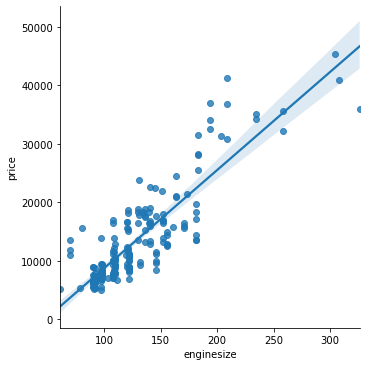

In [76]:
sns.lmplot(x = 'enginesize', y = 'price', data = df)

## Regressão Linear Múltipla

In [11]:
x = df[['enginesize', 'horsepower']].values
y = df['price'].values

lm2 = LinearRegression()
lm2.fit(x,y)

lm2.predict(np.array([130, 111]).reshape(1, -1))

array([14060.44286588])